# Statistical analysis of plane crashes

## Analyse the pattern of crashes over the years and find out the years where the fatal rate is maximum.

In [2]:
# extract the date,location,route of 1st 3 rows
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv('planecrash.csv')
array=['date','location','route']
print(data[array].head())



                 date                            location          route
0  September 17, 1908                 Fort Myer, Virginia  Demonstration
1  September 07, 1909             Juvisy-sur-Orge, France       Air show
2       July 12, 1912           Atlantic City, New Jersey    Test flight
3     August 06, 1913  Victoria, British Columbia, Canada              ?
4  September 09, 1913                  Over the North Sea              ?


In [3]:
data.describe()

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,aboard,fatalities,ground,summary
count,5783,5783,5783,5783,5783,5783,5783,5783,5783,5783,5783,5783,5783
unique,5213,1346,4715,2821,890,3875,2742,5394,4149,1042,917,54,5368
top,"August 31, 1988",?,"Moscow, Russia",Aeroflot,?,?,Douglas DC-3,?,?,2 (passengers:0 crew:2),1 (passengers:0 crew:1),0,?
freq,4,2108,18,260,4436,1494,341,352,1207,236,288,5474,231


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 13 columns):
date            5783 non-null object
time            5783 non-null object
location        5783 non-null object
operator        5783 non-null object
flight_no       5783 non-null object
route           5783 non-null object
ac_type         5783 non-null object
registration    5783 non-null object
cn_ln           5783 non-null object
aboard          5783 non-null object
fatalities      5783 non-null object
ground          5783 non-null object
summary         5783 non-null object
dtypes: object(13)
memory usage: 587.4+ KB


In [5]:
data.isnull().sum()

date            0
time            0
location        0
operator        0
flight_no       0
route           0
ac_type         0
registration    0
cn_ln           0
aboard          0
fatalities      0
ground          0
summary         0
dtype: int64

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,aboard,fatalities,ground,summary
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2.0,1.0,0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1.0,1.0,0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5.0,5.0,0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1.0,1.0,0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",c 18:30,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20.0,14.0,0,The airship flew into a thunderstorm and encou...


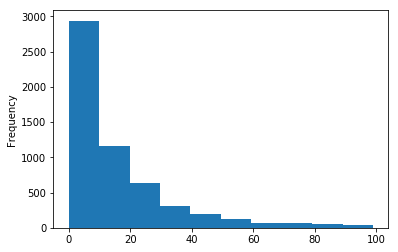

In [6]:

#Extracting only the fatality and aboard count and converting it to type int. The following modification is done 
# to extract the no. of fatalitites and thus being able to convert it into int. for furthur analysis.


df=pd.DataFrame(data)
df.groupby(['fatalities','route']).fatalities.count()
#cleaning the fatalitites column
pc=df.copy()
pc['fatalities']=np.where(df['fatalities'].str[0]=='?',0, df['fatalities'].str[0:4])
pc['aboard']=np.where(df['aboard'].str[0]=='?',0, df['aboard'].str[0:4])
pc.fatalities.astype("str")
pc.aboard.astype("str")
pc['fatalities']=pc['fatalities'].str.strip()
pc['aboard']=pc['aboard'].str.strip()

#print(pc.fatalities[101])
pc['fatalities']=pd.to_numeric(pc['fatalities'])
pc['aboard']=pd.to_numeric(pc['aboard'])

#pc.info()


pc.groupby('fatalities').fatalities.count()

pc[pc['fatalities']<100]['fatalities'].plot.hist()
pc.head(5)



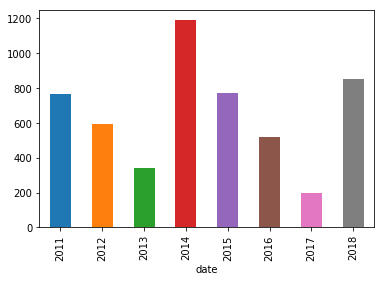

In [7]:


pc['date']=pc['date'].str[-4:]
pc['date']=pd.to_numeric(pc['date'])
pc['date']
pc.head(10)
pc[pc['date']>2010].groupby('date').fatalities.sum().plot(kind='bar')
#pc.groupby('aboard').fatalities.max().plot(color='orange',kind='line')

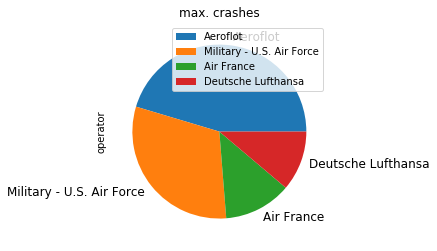

In [8]:
#Analysis of Top 5 airlines with max. no. of crashes using pie chart
a=df.operator.value_counts().sort_values(ascending=False).head(4)
type(a)

a.plot(kind="pie",
       title="max. crashes", 
       grid=True, fontsize =12,
       legend =True,
      )

In [9]:
#no. of operators from india 
df[df.operator.str.contains("India")==True].operator.value_counts()

Indian Airlines                               34
Military - Indian Air Force                   16
Air India                                     10
Indian Air Force                               4
Indian National Airlines                       2
Military - Royal Indian Air Force              2
Royal Indian Air Force                         1
Indian National Airways                        1
èkoda (India) Ltd                              1
Air India Express                              1
Military - Indian Navy                         1
Indian Airlines/Alliance Airlines              1
National Jet Services Inc.,  (Air Indiana)     1
Name: operator, dtype: int64

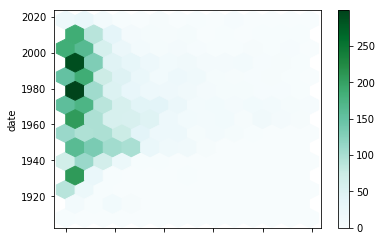

In [10]:
#plotting the graph for the fatalities count less thean 100
pc[pc['fatalities'] < 100].plot.hexbin(x='fatalities', y='date',gridsize=13)


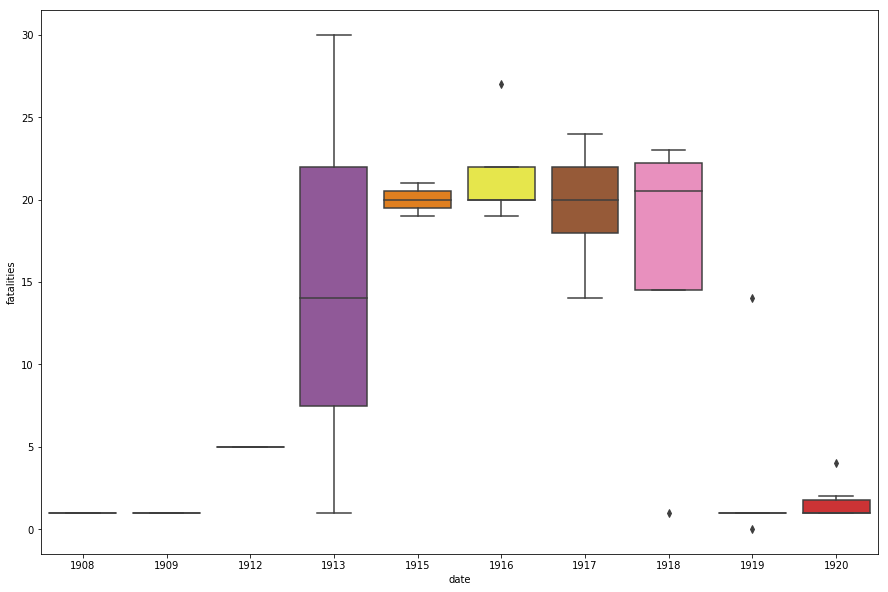

In [11]:
plt.subplots(figsize = (15,10))
ax = sns.boxplot(x="date", y="fatalities",palette="Set1" ,data=pc.head(50))

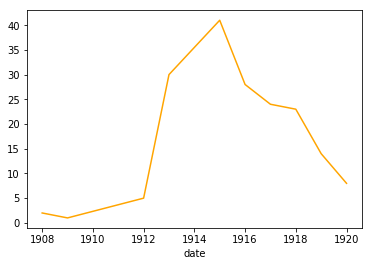

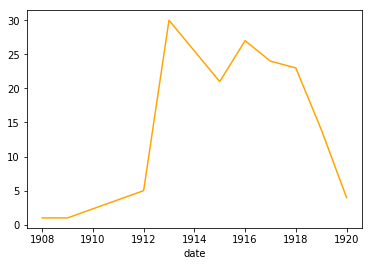

In [22]:
#plot the max no. of aboard passengers in the airlines
pc['fatalities']=np.where(df['fatalities'].str[0]=='?',0, df['fatalities'].str[0:4])
pc['aboard']=np.where(df['aboard'].str[0]=='?',0, df['aboard'].str[0:4])
pc.fatalities.astype("str")
pc.aboard.astype("str")
pc['fatalities']=pc['fatalities'].str.strip()
pc['aboard']=pc['aboard'].str.strip()
pc['fatalities']=pd.to_numeric(pc['fatalities'])
pc['aboard']=pd.to_numeric(pc['aboard'])

pc.groupby('date').aboard.max().head(10).plot(color='orange',kind='line')
plt.figure()
pc.groupby('date').fatalities.max().head(10).plot(color='orange',kind='line')


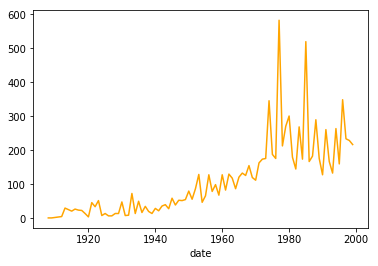

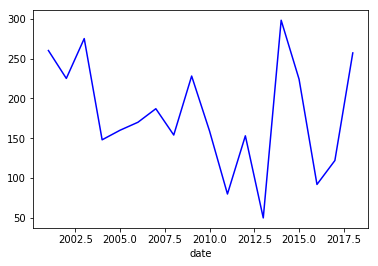

In [13]:
#grouping the max fatalities rate for the years less than 2005 and greater than 2000
pc[pc['date']<2000].groupby('date').fatalities.max().plot(color='orange',kind='line')
plt.figure()
pc[pc['date']>2000].groupby('date').fatalities.max().plot(color='blue',kind='line')

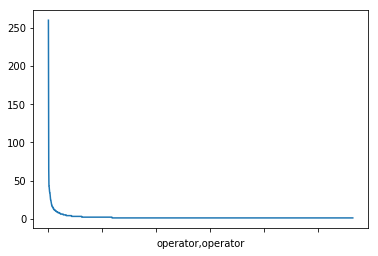

In [14]:
#To count the no. of aircrafts operated by india during the crash

df.groupby([df.operator.str.contains("germany")==True]).operator.value_counts().plot()


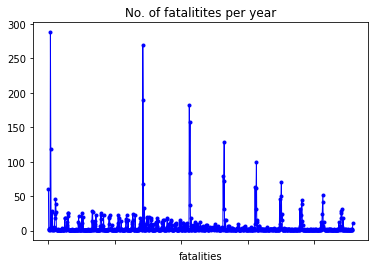

In [15]:
#group the fatalities rate according to the date 
Temp = data.groupby('fatalities')['date'].count() 

Temp.plot(color='blue', marker = ".", title="No. of fatalitites per year",linewidth=1)



C:\Users\ramya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


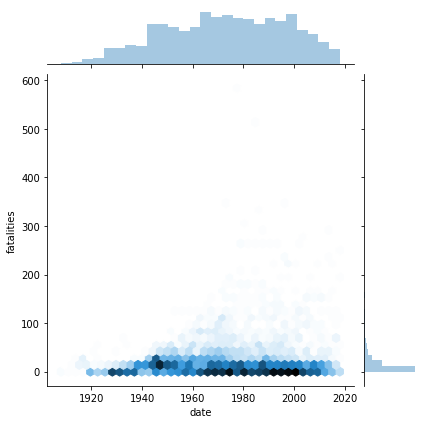

In [16]:
sns.jointplot(x="date",y="fatalities",data=pc,kind='hex')

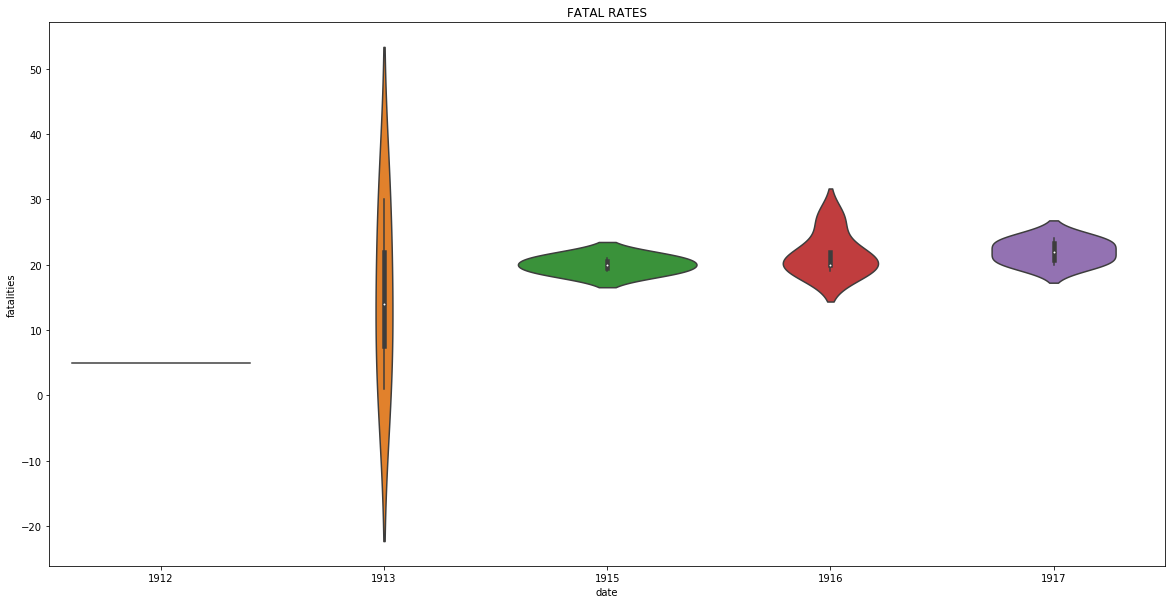

In [17]:
#plotting violinplot of fatalities udirng different years
plt.subplots(figsize = (20,10))
plt.title('FATAL RATES')
sns.violinplot(x = "date", y = "fatalities",data = pc[pc['date']>1910].head(15))

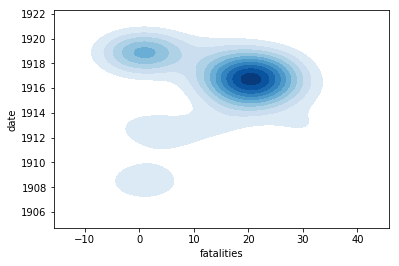

In [18]:
sns.kdeplot(pc['fatalities'].head(30),pc['date'].head(30),cmap='Blues', shade=True, shade_lowest=False)

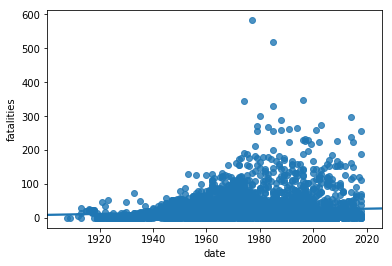

In [19]:
sns.regplot(pc['date'],pc['fatalities'])

## Conclusion:
### From the analysis,it can be concluded that accident rates have been dropped over the years.